Load sampler and sample


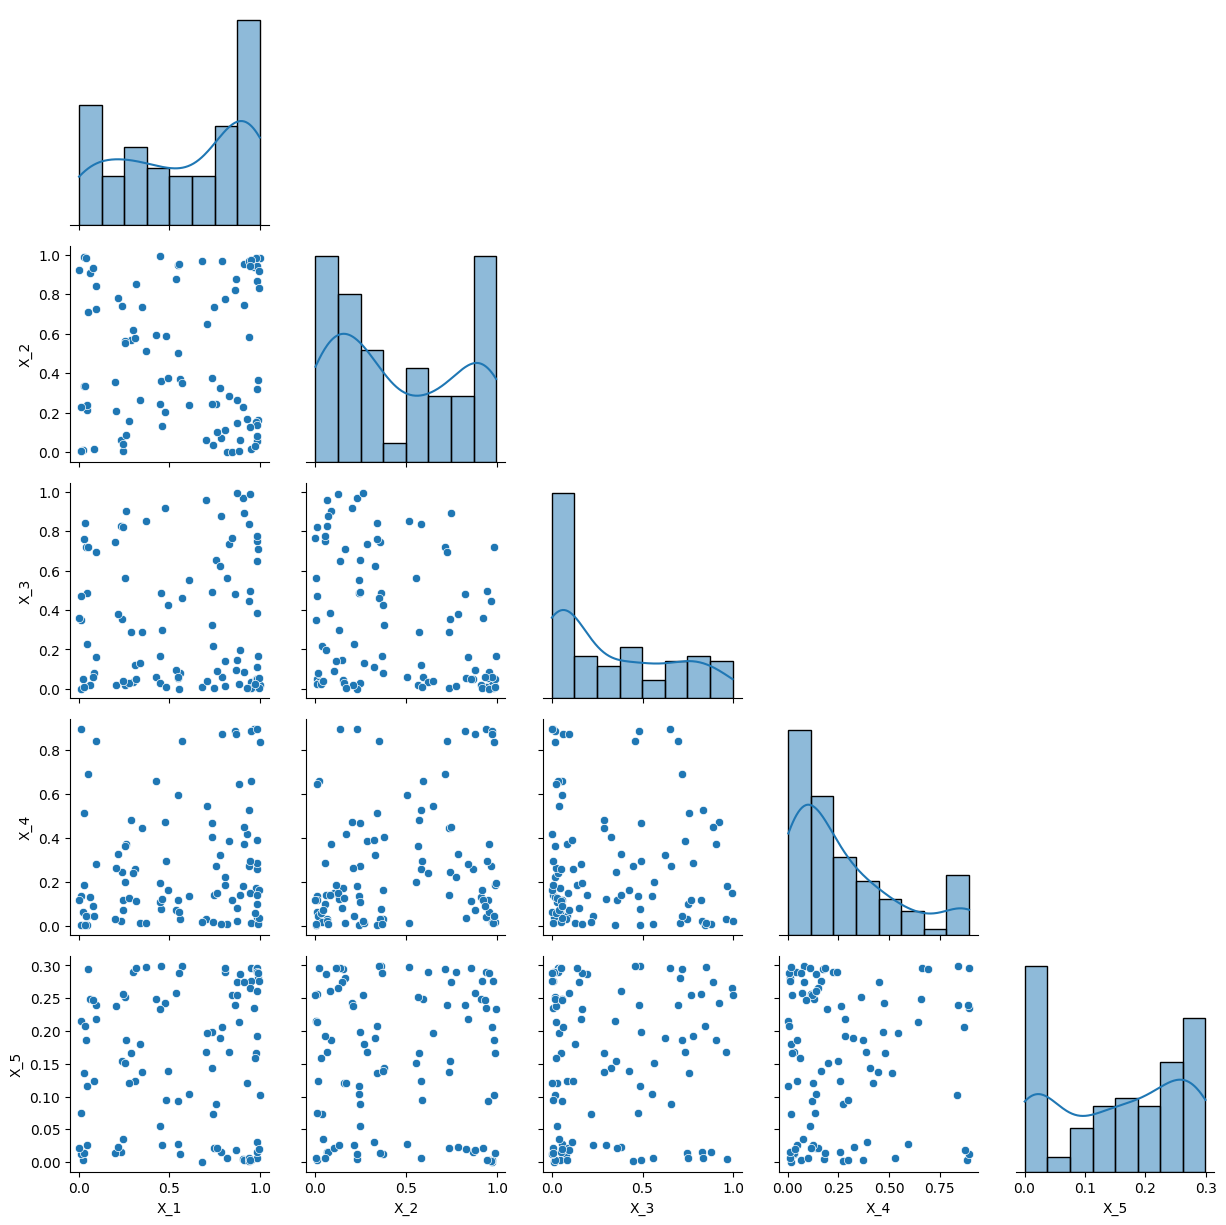

In [28]:
from juliacall import Main as jl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


#long to run???
jl.seval("""using SequentialMeasureTransport""")
jl.seval("""import SequentialMeasureTransport as SMT""")
jl.seval("""using Distributions""")
jl.seval("""using PythonCall""")


print('Load sampler and sample')
jl.seval("""sampler = SMT.load_sampler("smp.jld2")""")
jl.seval("""sample = rand(sampler, 100) #10 000 samples""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample...)) """))

#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=['X_1', 'X_2','X_3','X_4','X_5'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
# g.map_lower(sns.kdeplot, fill=True)
g.map_lower(sns.scatterplot)

g.map_diag(sns.histplot, kde=True)